In [1]:
# open the generated synthetic data file and read it as a python dictionary called data

import json
import emip_toolkit as EMTK

import correction

import numpy as np
import algorithms as algo
from tqdm import tqdm

import time

import matplotlib.pyplot as plt
import statistics

In [2]:
def load_emip_json_data(filename):
    file = open(filename, 'r')
    data = json.loads(file.read())
    data = list(data.values())
    return data

example_input = load_emip_json_data("example_data_input.json")
example_truth = load_emip_json_data("example_data_truth.json")
print(example_input[:5])

[[799.0872727, 312.1445455, 88.0], [850.9412121, 307.2460606, 132.0], [842.9616279, 302.7576744, 172.0], [883.1030769, 306.5711538, 208.0], [883.1030769, 306.5711538, 208.0]]


In [3]:
# find areas of interest (AOIs) once again
image_path = "./"
image = "example_data_image.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

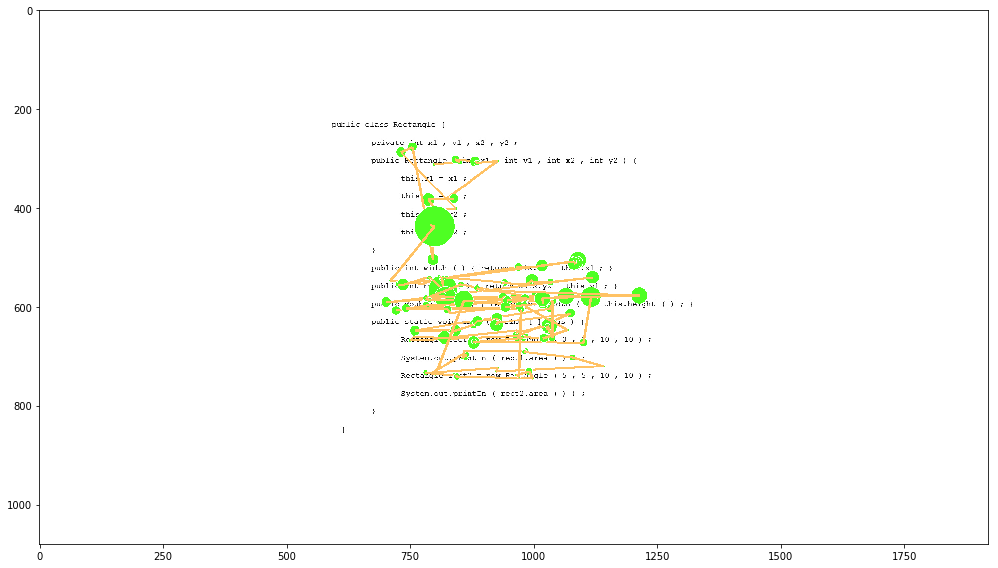

In [4]:
# draw original correct fixations
correction.draw_fixation(image, example_input.copy())

In [5]:
# generate noise over the correct trial

# PENDING NOISE GENERATION

def plot_raw_data_on_image():
    error_test = correction.error_noise(1, 30, 1, example_data.copy())

    # draw the trial with added error
    correction.draw_fixation(image, error_test)

In [6]:
# find the center of each word, we need this for warp, mode of disparities, etc.

def warp_correction_example():
    # warp correction
    np_array = np.array(error_test.copy(), dtype=int)
    durations = np.delete(np_array, 0, 1)
    durations = np.delete(durations, 0, 1)
    np_array = np.delete(np_array, 2, 1)

    # run warp
    warp_correction = algo.warp(np_array, word_centers)

    # this is a cool function that checks the quality of the correction
    percentage, match_list = correction.correction_quality(aoi, example_data.copy(), warp_correction)
    print(percentage)

    # this is a cool function that draws the correction in red if the algorithm made a mistake
    correction.draw_correction(image, warp_correction, match_list)

This concludes the example I wanted to show you of running an error generator, then correcting the data, then seeing how well the correction algorithm did.  You will need to repeat the same concept for a bunch of algorithms in the next section.

# Comparing algorithms with Noise error:

In this example, I show you one type of erro "Noise" you will implement all 5 types and add skipping to your assessment.  Also, the code below runs only 4 algorithms, you will add the remaining 6 algorithms to this assessment for each type of error. 

In [7]:
word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

In [57]:
# TODO: add back in  "chain"

algorithms = ["compare", "compare_line_len", "compare_fixnum", "attach", "cluster", "compare", "merge", "regress", "segment", "split", "stretch", "warp", "correction_mode_of_disparities"]
algorithms_needs_word_center = ["compare", "compare_line_len", "compare_fixnum", "warp"]
algorithms_needs_aoi = []

# idea is to use this like:
#run_algorithms_on_data(real_data)
#run_algorithms_on_data(fake_data_error_prob0)
#run_algorithms_on_data(fake_data_error_prob1)

def run_algorithms_on_data(data_input, data_truth, verbose=True):
    '''
    
    data_input: what the algorithm sees
    data_truth: the ground truth that the algorithm is judged against
    
    '''
    
    results = {}

    for alg in algorithms:
        data_input_copy = np.array(data_input.copy())
        if alg in algorithms_needs_word_center:
            model_guess = getattr(algo, alg)(data_input_copy[:,:2], word_centers)
        else:
            model_guess = getattr(algo, alg)(data_input_copy, np.array(line_ys))

        percentage, match_list = correction.correction_quality(aoi, data_truth.copy(), model_guess)
        results[alg] = {"percentage": percentage, "match_list": match_list, "model_guess": model_guess.tolist()}

        if verbose:
            print(f"{alg} got {round(percentage * 100, 2)}% accuracy")

    return results

In [58]:
run_algorithms_on_data(example_input, example_truth)

compare got 7.04% accuracy
compare_line_len got 7.04% accuracy
compare_fixnum got 21.13% accuracy
attach got 73.94% accuracy
cluster got 9.15% accuracy
compare got 7.04% accuracy
merge got 2.11% accuracy
regress got 0.0% accuracy
segment got 12.68% accuracy
split got 65.49% accuracy
stretch got 0.0% accuracy
warp got 41.55% accuracy


{'compare': {'percentage': 0.07042253521126761,
  'match_list': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'model_guess': [[799.0872727, 631.0],
   [850.9412121, 631.0],
   [842.9616279, 631

In [59]:
# CODE TO RUN THE ALGORITHMS ON THE SILVER DATA
SILVER_DATA_ALL_PATH = "../CS421-Spring23-Fix8/silver_data_all.json"

In [60]:
def load_data_from_filename(filename):
    with open(filename, "r") as f:
        file_content = f.read()
        try:
            json_loaded = json.loads(file_content)
        except:
            print(f"Skipping {filename} because malformed JSON")
            return None
        
        return list(json_loaded.values())

In [61]:
def filter_fixations_to_be_within_bounds(fixations, bound_lo, bound_hi):
    result = []
    for raw_datum in raw_data:
        if bound_lo < raw_datum[2] < bound_hi:
            result.append(raw_datum)
    return result

In [62]:
with open(SILVER_DATA_ALL_PATH, "r") as infile:
    silver_data_all = json.loads(infile.read())

In [68]:
silver_data_results = []

import time

for index, silver_data in enumerate(silver_data_all):
    
    print(f">>>> {time.time()} running {index}/{len(silver_data_all)}")

    raw_data = silver_data["raw_data"]
    corrected_data = silver_data["corrected_data"]

    raw_data_filtered = filter_fixations_to_be_within_bounds(raw_data, 100, 1000)
    
    if len(raw_data_filtered) == len(corrected_data):
        print(f"running on {silver_data['filename']} with {len(raw_data_filtered)} fixations")
        try:
            result_of_run = run_algorithms_on_data(raw_data_filtered, corrected_data)
            silver_data_results.append({"silver_data_copy": silver_data, "run_results": result_of_run})
        except:
            print(f"ran into error")
    else:
        print("raw_data filtered fixation count doesn't match corrected data fixation count")


>>>> 1682292645.835574 running 0/46
running on trial_2_participant_110_rectangle_java2_CORRECTED.json with 56 fixations
compare got 0.0% accuracy
compare_line_len got 21.43% accuracy
compare_fixnum got 16.07% accuracy
attach got 91.07% accuracy
cluster got 32.14% accuracy
compare got 0.0% accuracy
merge got 12.5% accuracy
regress got 87.5% accuracy
segment got 7.14% accuracy
split got 55.36% accuracy
stretch got 87.5% accuracy
warp got 30.36% accuracy
>>>> 1682292658.905453 running 1/46
running on trial_2_participant_145_rectangle_java2_CORRECTED.json with 35 fixations
compare got 0.0% accuracy
compare_line_len got 0.0% accuracy
compare_fixnum got 0.0% accuracy
attach got 88.57% accuracy
cluster got 14.29% accuracy
compare got 0.0% accuracy
merge got 0.0% accuracy
regress got 80.0% accuracy
segment got 0.0% accuracy
split got 71.43% accuracy
stretch got 74.29% accuracy
warp got 54.29% accuracy
>>>> 1682292667.0799181 running 2/46
running on trial_5_participant_65_vehicle_java_CORRECTED

merge got 0.0% accuracy
regress got 10.75% accuracy
segment got 4.3% accuracy
split got 25.81% accuracy
stretch got 39.78% accuracy
warp got 11.83% accuracy
>>>> 1682293492.538296 running 19/46
running on trial_5_participant_181_vehicle_java2_CORRECTED.json with 70 fixations
compare got 2.86% accuracy
compare_line_len got 7.14% accuracy
compare_fixnum got 7.14% accuracy
attach got 20.0% accuracy
cluster got 0.0% accuracy
compare got 2.86% accuracy
merge got 0.0% accuracy
regress got 18.57% accuracy
segment got 5.71% accuracy
split got 2.86% accuracy
stretch got 7.14% accuracy
warp got 12.86% accuracy
>>>> 1682293507.031977 running 20/46
running on trial_5_participant_133_vehicle_java2_CORRECTED.json with 27 fixations
compare got 0.0% accuracy
compare_line_len got 0.0% accuracy
compare_fixnum got 11.11% accuracy
attach got 44.44% accuracy
cluster got 22.22% accuracy
compare got 0.0% accuracy
merge got 14.81% accuracy
regress got 0.0% accuracy
segment got 7.41% accuracy
split got 18.52% 

segment got 3.85% accuracy
split got 7.69% accuracy
stretch got 3.85% accuracy
warp got 7.69% accuracy
>>>> 1682299573.331136 running 37/46
running on trial_2_participant_124_vehicle_java2_CORRECTED.json with 63 fixations
compare got 0.0% accuracy
compare_line_len got 0.0% accuracy
compare_fixnum got 0.0% accuracy
attach got 6.35% accuracy
cluster got 0.0% accuracy
compare got 0.0% accuracy
merge got 0.0% accuracy
regress got 3.17% accuracy
segment got 3.17% accuracy
split got 0.0% accuracy
stretch got 4.76% accuracy
warp got 3.17% accuracy
>>>> 1682299585.643647 running 38/46
running on trial_5_participant_147_vehicle_java2_CORRECTED.json with 14 fixations
compare got 0.0% accuracy
compare_line_len got 0.0% accuracy
compare_fixnum got 0.0% accuracy
attach got 14.29% accuracy
ran into error
>>>> 1682299586.443941 running 39/46
running on trial_5_participant_105_vehicle_java2_CORRECTED.json with 58 fixations
compare got 0.0% accuracy
compare_line_len got 0.0% accuracy
compare_fixnum got

In [67]:
with open("silver_data_results_20230423_1748.json", "w") as silver_data_out_file:
    silver_data_out_file.write(json.dumps(silver_data_results))


In [81]:
def analyze_results(results):
    answer = {}
    
    for result in results:
        for algo in result["run_results"]:
            
            if algo not in answer:
                answer[algo] = {"correct_fix": 0, "wrong_fix": 0, "num_trials": 0}
                
            algo_results = result["run_results"][algo]
            match_list = algo_results["match_list"]
            
            answer[algo]["correct_fix"] += match_list.count(1)
            answer[algo]["wrong_fix"]   += match_list.count(0)
            answer[algo]["wrong_fix"]   += len(match_list)
            answer[algo]["num_trials"]  += 1
    
    for algo in answer:
        answer[algo]["percentage"] = 100 * (answer[algo]["correct_fix"] / answer[algo]["wrong_fix"])
        
    return answer
        
silver_data_analysis = analyze_results(silver_data_results)

In [82]:
silver_data_analysis

{'compare': {'correct_fix': 265,
  'wrong_fix': 9409,
  'num_trials': 43,
  'percentage': 2.8164523328727813},
 'compare_line_len': {'correct_fix': 235,
  'wrong_fix': 9439,
  'num_trials': 43,
  'percentage': 2.4896705159444856},
 'compare_fixnum': {'correct_fix': 257,
  'wrong_fix': 9417,
  'num_trials': 43,
  'percentage': 2.7291069342678136},
 'attach': {'correct_fix': 1610,
  'wrong_fix': 8064,
  'num_trials': 43,
  'percentage': 19.96527777777778},
 'cluster': {'correct_fix': 277,
  'wrong_fix': 9397,
  'num_trials': 43,
  'percentage': 2.9477492816856445},
 'merge': {'correct_fix': 198,
  'wrong_fix': 9476,
  'num_trials': 43,
  'percentage': 2.089489235964542},
 'regress': {'correct_fix': 1154,
  'wrong_fix': 8520,
  'num_trials': 43,
  'percentage': 13.544600938967136},
 'segment': {'correct_fix': 181,
  'wrong_fix': 9493,
  'num_trials': 43,
  'percentage': 1.9066680712103656},
 'split': {'correct_fix': 1086,
  'wrong_fix': 8588,
  'num_trials': 43,
  'percentage': 12.6455519

In [ ]:
# OTHER CODE NOT CLEANED YET

In [ ]:
def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [ ]:
def plot_results(mean_results):
    
    
    
    markers = ".ov^<>1234"
    for i, alg in enumerate(algorithms):
        plt.plot(mean_results[alg], marker=markers[i]) # color='Black', linewidth=1, marker='^')

    plt.legend(algorithms)
    plt.ylabel('accuracy')
    plt.xlabel('noise')

    x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    plt.xticks(range(0, 11), x_ticks_labels)
    #plt.savefig("noise_comparison.png")
    plt.show()

    


In [ ]:
def noise_error(prob, data, robot_str):
    x = correction.error_noise(prob/10, 30, prob/10, data[robot_str].copy())
    return x

noise_results = run_error_on_algorithms(noise_error, data)


In [ ]:
noise_results

In [ ]:
mean_noise_results = {alg:mean_error_group(noise_results[alg]) for alg in algorithms}
plot_results(mean_noise_results)

In [ ]:
for alg in algorithms:
    print(f"mean {alg}:", statistics.mean(mean_results[alg]))